In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('kc_house_data_2.csv')
data.head()

data.shape

(21613, 35)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

x=data.drop('price',axis=1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)

In [6]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)

0.7513670773560932

In [7]:
print(r2_score(y_test,lin_reg.predict(x_test)))

alphas   = np.logspace(-5, 3, 200)
coefs = []

0.7293377892880162


In [8]:
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True) # Since we did not add a col of 1s
    ridge.fit(x_train,y_train)
    coefs.append(ridge.coef_)



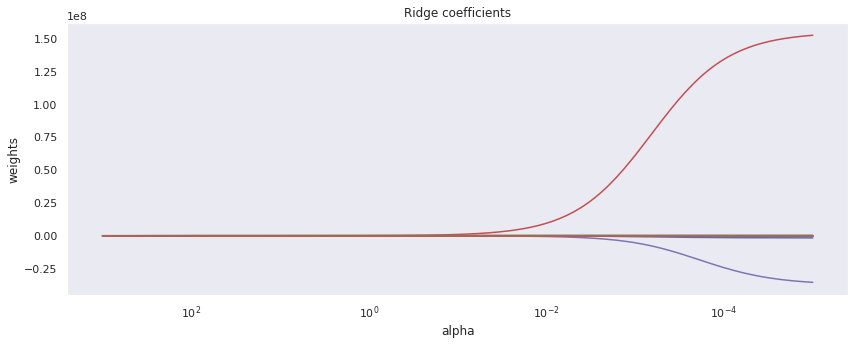

In [9]:
plt.figure(figsize=(14, 5))
plt.grid()

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')

plt.title('Ridge coefficients');

In [10]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(Ridge(),param_grid={'alpha':[0.01,1,10,50,100]})
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
gs.best_params_

{'alpha': 50}

In [12]:
lin_reg.coef_

array([-6.65262180e+03, -2.51047041e+04,  4.89553051e+05,  2.73253018e-03,
       -5.61853477e+04,  2.60952141e+05,  1.53928708e+04,  6.36897362e+04,
       -2.03532766e+05, -4.89517027e+05, -4.89564192e+05, -7.00202185e+04,
       -4.00188591e+03,  1.54897460e+08, -3.72888977e+07,  1.02650271e+02,
       -2.05522401e-01,  2.33436722e+02,  1.37635429e+04,  4.06382313e-02,
        1.24746197e-07,  1.33358901e+04,  2.60647958e+05,  9.54790404e+03,
       -2.26350501e+03,  1.92842857e+04, -2.74031326e-02, -7.67713162e-02,
        1.74546651e+01,  2.02415772e+00, -1.62323088e+06, -1.52156333e+05,
       -1.33720364e-02,  2.38536359e-07])

In [13]:
rid_reg=Ridge(alpha=50)
rid_reg.fit(x_train,y_train)
rid_reg.score(x_train,y_train)


0.7433764834403117

In [14]:
print(r2_score(y_test,rid_reg.predict(x_test)))

0.7220303146839474


In [15]:
las_reg=Lasso(alpha=50,)
las_reg.fit(x_train,y_train)
las_reg.score(x_train,y_train)

0.7416283326229441

In [16]:
print(r2_score(y_test,las_reg.predict(x_test)))

0.720394103220962


In [17]:
ela_reg=ElasticNet(alpha=50)
ela_reg.fit(x_train,y_train)
ela_reg.score(x_train,y_train)

0.7077993420657009

In [18]:
print(r2_score(y_test,ela_reg.predict(x_test)))

0.686637268485623


In [19]:
result=pd.DataFrame(index=['Linear','Ridge','Lasso','ElasticNet'])
result['Train_score']=[lin_reg.score(x_train,y_train),rid_reg.score(x_train,y_train),
                       las_reg.score(x_train,y_train),ela_reg.score(x_train,y_train)]

result['Test_Score']=[r2_score(y_test,lin_reg.predict(x_test)),
                               r2_score(y_test,rid_reg.predict(x_test)),
                                        r2_score(y_test,las_reg.predict(x_test)),r2_score(y_test,ela_reg.predict(x_test))]
result                                                                                                        
                                                                                                          

,Train_score,Test_Score
Linear,0.751367,0.729338
Ridge,0.743376,0.722030
Lasso,0.741628,0.720394
ElasticNet,0.707799,0.686637


In [20]:
pd.DataFrame({'Lasso Coefficient':las_reg.coef_,'Ridge Coefficient':rid_reg.coef_,'Linear':lin_reg.coef_,'ElasticNet':ela_reg.coef_})

,Lasso Coefficient,Ridge Coefficient,Linear,ElasticNet
0,-9.958386e+03,-8.678445e+03,-6.652622e+03,-2.237666e+02
1,-2.204184e+04,-2.936065e+04,-2.510470e+04,3.221702e+02
2,-1.700868e+02,8.033926e+00,4.895531e+05,1.338288e+00
3,-9.833554e-02,-6.322316e-02,2.732530e-03,-1.014776e-01
4,-0.000000e+00,-2.435809e+04,-5.618535e+04,1.586500e+02
5,3.742774e+05,2.015897e+05,2.609521e+05,1.745274e+02
6,1.336499e+04,4.589429e+03,1.539287e+04,1.073571e+03
7,2.491344e+04,2.661949e+04,6.368974e+04,2.939406e+02
8,-2.039379e+05,-1.655147e+05,-2.035328e+05,2.743144e+02
9,1.932429e+02,1.536861e+01,-4.895170e+05,6.114999e+00
